<a href="https://colab.research.google.com/github/SubhamMohanty187/Data-Science/blob/main/Python/Dimensionality_Reduction_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en;q=0.9,en-US;q=0.8,hi;q=0.7" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3004/861823/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1641572404&Signature=pCjPgbZT2nNnrMoKqDUdnauIfP%2FuVKXn6iwFEdc6LpJ1vUs6oQNkakZljRHz%2BlUgH8oyUcZKPewrOcjRj0N0fu4gxXcfnqXCJuU9NKwxvkKMo%2BehQum%2FLCvVMyYX2hI6kcQDCLq8LrxVzHC7q7BAuOYGcrsT4oc4BsuuVYN%2BG2po6FzvBYN4OTZncV1iM1BVkHr5jpXdVSH1CYal0tE8LknWxPJ7nQOiX3%2FCPi9UEohodtCxNTc4IXG40MZeVbpTnJIrqyYlWOBF%2B%2BftQCMWJzUskBtgzgi2naGVroZmPK4Uig%2FBBgV%2FKIbgj4wlOm%2B0UEbYfnl372EZKqUGspElgQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip" -c -O 'train.csv.zip'


--2022-01-07 08:03:52--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3004/861823/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1641572404&Signature=pCjPgbZT2nNnrMoKqDUdnauIfP%2FuVKXn6iwFEdc6LpJ1vUs6oQNkakZljRHz%2BlUgH8oyUcZKPewrOcjRj0N0fu4gxXcfnqXCJuU9NKwxvkKMo%2BehQum%2FLCvVMyYX2hI6kcQDCLq8LrxVzHC7q7BAuOYGcrsT4oc4BsuuVYN%2BG2po6FzvBYN4OTZncV1iM1BVkHr5jpXdVSH1CYal0tE8LknWxPJ7nQOiX3%2FCPi9UEohodtCxNTc4IXG40MZeVbpTnJIrqyYlWOBF%2B%2BftQCMWJzUskBtgzgi2naGVroZmPK4Uig%2FBBgV%2FKIbgj4wlOm%2B0UEbYfnl372EZKqUGspElgQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9606023 (9.2M) [application/zip]
Saving to: ‘train.csv.zip’

train.csv.zip   

In [3]:
df = pd.read_csv("train.csv.zip")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
lab = df["label"]     #store "label" in "lab"
lab.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [5]:
d=df.drop("label",axis=1)   #separate the label from the data and store in "d"

In [6]:
print(lab.shape)
print(d.shape)

(42000,)
(42000, 784)


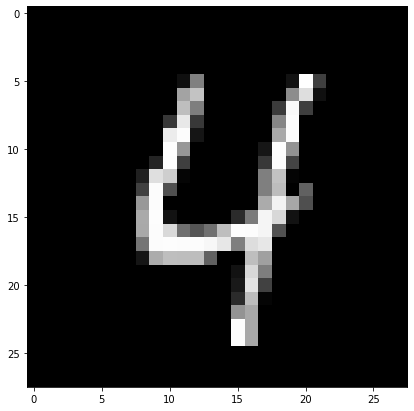

value is:  4


In [7]:
plt.figure(figsize=(7,7))
idx=1504
gd = (d.loc[idx]).to_numpy().reshape(28,28)    #to_numpy converts the element to a matrix 
plt.imshow(gd,interpolation=None, cmap="gray")   #imshow() is used to show images
plt.show()

print("value is: ",lab[idx])

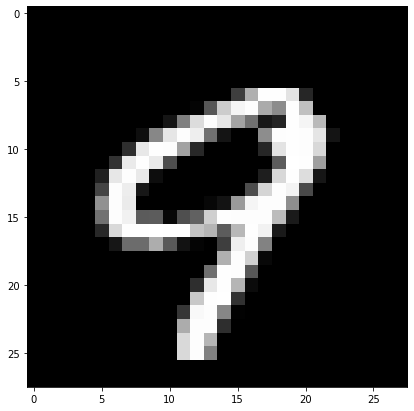

value is:  9


In [8]:
plt.figure(figsize=(7,7))
idx=100
gd = (d.loc[idx]).to_numpy().reshape(28,28)    #to_numpy converts the element to a matrix 
plt.imshow(gd,interpolation=None, cmap="gray")   #imshow() is used to show images
plt.show()

print("value is: ",lab[idx])

###2D VISUALIZATION USING PCA

In [9]:
labels = lab.head(42000)
data = d.head(42000)
print("Shape of sample data: ",data.shape)

Shape of sample data:  (42000, 784)


In [10]:
#Data preprocessing: Standaradizing the data
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(data)    #standardizing the data and transforming the datapoints to std_data
print(std_data.shape)

(42000, 784)


In [11]:
#Now we have to find the covariance matrix i.e (X^t * X)/n with dimensions dxd
sample_data = std_data
cov_mat = np.matmul(sample_data.T,sample_data) # matmul is used to do matrix multiplication in numpy.
print("Shape of covariance matrix: ",cov_mat.shape)

Shape of covariance matrix:  (784, 784)


In [12]:
# find the eigenvalues and corresponding eigenvectors  
from scipy.linalg import eigh
e_val,e_vect = eigh(cov_mat, eigvals=(782,783))  #eigh will return eigen vaues and eigen vectors respectively in ascending order
                                               # that means the top two eigen values will be at the last positions(i.e 782 and 783) 
                                               # and eigvals=(782,783) will give us only those values instead of all the eigen values & vectors.
print("Shape of eigen vectors: ",e_vect.shape)
# now we convert the eigen vectors to (2,d) shape for easier matrix multiplication.
e_vect = e_vect.T
print("New shape of eigen vectors: ",e_vect.shape)

Shape of eigen vectors:  (784, 2)
New shape of eigen vectors:  (2, 784)


In [13]:
# Now project the original data on the plane formed by top two eigen vectors using vector-vector multiplication
new_coordinates = np.matmul(e_vect , sample_data.T)
print("Resultant new data points: ",e_vect.shape ," X ",sample_data.T.shape," = ",new_coordinates.shape)

Resultant new data points:  (2, 784)  X  (784, 42000)  =  (2, 42000)


In [14]:
# appending labels to the projected data
new_coordinates = np.vstack((new_coordinates , labels)).T
#now create a dataframe of these coordinates
df = pd.DataFrame(data=new_coordinates,columns=("1st_principal", "2nd_principal", "label"))
df.head()

,1st_principal,2nd_principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


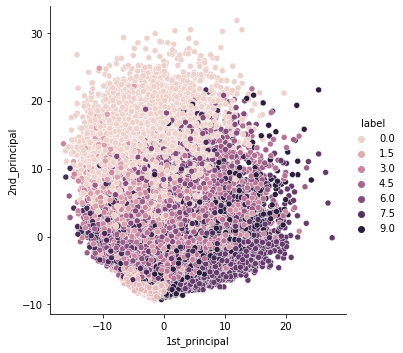

In [15]:
#plot these data with seaborn
import seaborn as sns
sns.relplot(x="1st_principal",y="2nd_principal",data=df,hue="label",kind="scatter")
plt.show()

###PCA Using Scikit Learn

In [16]:
from sklearn import decomposition
pca = decomposition.PCA()


In [17]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print("Reduced shape of pda data: ",pca_data.shape)

Reduced shape of pda data:  (42000, 2)


In [18]:
pca_data = np.vstack((pca_data.T , labels)).T
#now create a dataframe of these coordinates
df1 = pd.DataFrame(data=pca_data,columns=("1st_principal", "2nd_principal", "label"))
df.head()

,1st_principal,2nd_principal,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


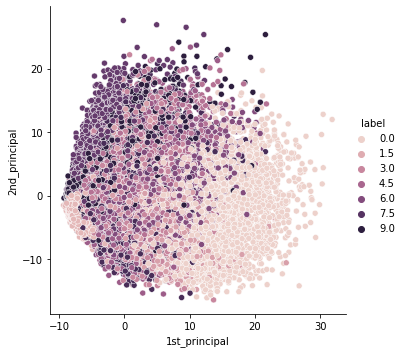

In [19]:
sns.relplot(x="1st_principal",y="2nd_principal",data=df1,hue="label",kind="scatter")
plt.show()

###t-SNE Using Scikit Learn

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


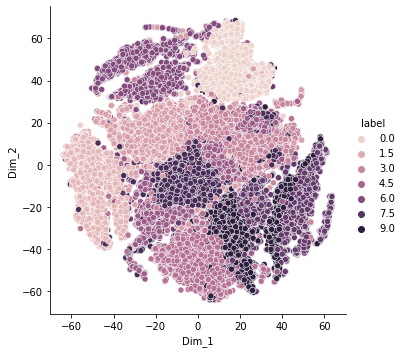

In [21]:
from sklearn.manifold import TSNE
data_42k = std_data[0:42000,:]   # we have taken 42k datapoints for t-SNE visualization.
labels_42k = labels[0:42000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_42k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_42k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.relplot(data=tsne_df,x="Dim_1",y="Dim_2",hue="label",kind="scatter")
plt.show()